In [9]:
# Este programa ejecuta una simulación de trayectoria del precio de las acciones durante los próximos 252 días de negociación (o un año de negociación) para las acciones de XXX, basado en una 
# distribución de probabilidad normal de los rendimientos diarios promedio históricos derivados de la media y la desviación estándar de la muestra.
import os
import numpy as np
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [10]:
from dotenv import load_dotenv
load_dotenv("env.txt")

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)
load_dotenv("env.txt")

True

In [16]:
ticker = "LCID"


# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 4 years from Today
start_date = pd.Timestamp("2021-04-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-04-04", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for AAPL
ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

ticker_data.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2021-04-05 04:00:00+00:00,24.55,24.6100,23.00,23.00,13235917,125082,23.642020
2021-04-06 04:00:00+00:00,23.05,24.9600,23.02,24.46,19839723,133926,24.006474
2021-04-07 04:00:00+00:00,24.11,24.4700,22.70,22.82,15339650,118744,23.436159
2021-04-08 04:00:00+00:00,23.06,23.3699,22.66,23.16,7920397,67259,23.080302
2021-04-09 04:00:00+00:00,22.98,23.3400,22.76,22.97,7628920,67145,23.016590


In [17]:
ticker_data = pd.concat([ticker_data], axis=1, keys=["LCID"])
ticker_data.head()

LCID                                               \
                            open     high    low  close    volume trade_count   
timestamp                                                                       
2021-04-05 04:00:00+00:00  24.55  24.6100  23.00  23.00  13235917      125082   
2021-04-06 04:00:00+00:00  23.05  24.9600  23.02  24.46  19839723      133926   
2021-04-07 04:00:00+00:00  24.11  24.4700  22.70  22.82  15339650      118744   
2021-04-08 04:00:00+00:00  23.06  23.3699  22.66  23.16   7920397       67259   
2021-04-09 04:00:00+00:00  22.98  23.3400  22.76  22.97   7628920       67145   

                                      
                                vwap  
timestamp                             
2021-04-05 04:00:00+00:00  23.642020  
2021-04-06 04:00:00+00:00  24.006474  
2021-04-07 04:00:00+00:00  23.436159  
2021-04-08 04:00:00+00:00  23.080302  
2021-04-09 04:00:00+00:00  23.016590

In [40]:
cantidad_simulaciones = 1000
# simular el daily return basado en 500 simulaciones
MC_LCID = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = cantidad_simulaciones,
    num_trading_days = 252)

In [41]:
MC_LCID.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 410.
Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.
Running Monte Carlo simulation number 440.
Running Monte Carlo simulation number 450.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.
Running Monte Carlo simulation number 480.
Running Monte Carlo simulation number 490.
Running Monte Carlo simulation number 500.
Running Monte Carlo simulation number 510.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 520.
Running Monte Carlo simulation number 530.
Running Monte Carlo simulation number 540.
Running Monte Carlo simulation number 550.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 560.
Running Monte Carlo simulation number 570.
Running Monte Carlo simulation number 580.
Running Monte Carlo simulation number 590.
Running Monte Carlo simulation number 600.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 610.
Running Monte Carlo simulation number 620.
Running Monte Carlo simulation number 630.
Running Monte Carlo simulation number 640.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 650.
Running Monte Carlo simulation number 660.
Running Monte Carlo simulation number 670.
Running Monte Carlo simulation number 680.
Running Monte Carlo simulation number 690.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 700.
Running Monte Carlo simulation number 710.
Running Monte Carlo simulation number 720.
Running Monte Carlo simulation number 730.
Running Monte Carlo simulation number 740.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 750.
Running Monte Carlo simulation number 760.
Running Monte Carlo simulation number 770.
Running Monte Carlo simulation number 780.
Running Monte Carlo simulation number 790.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 800.
Running Monte Carlo simulation number 810.
Running Monte Carlo simulation number 820.
Running Monte Carlo simulation number 830.
Running Monte Carlo simulation number 840.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 850.
Running Monte Carlo simulation number 860.
Running Monte Carlo simulation number 870.
Running Monte Carlo simulation number 880.
Running Monte Carlo simulation number 890.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 900.
Running Monte Carlo simulation number 910.
Running Monte Carlo simulation number 920.
Running Monte Carlo simulation number 930.
Running Monte Carlo simulation number 940.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 950.
Running Monte Carlo simulation number 960.
Running Monte Carlo simulation number 970.
Running Monte Carlo simulation number 980.
Running Monte Carlo simulation number 990.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.027465,0.985794,0.988549,0.982395,1.054403,1.063707,1.016409,0.990269,0.988394,1.008383,...,0.991219,1.047211,0.938418,1.052759,1.097167,1.053057,1.082237,0.998772,1.061230,0.956009
2,0.973486,1.008185,0.984225,0.974694,1.071401,1.157332,0.931582,1.084602,0.999988,0.982935,...,0.984475,0.960687,0.868592,1.094571,1.108139,0.995728,0.962983,1.048666,1.052339,1.023065
3,0.923459,1.034864,1.033577,1.015274,1.142585,1.146825,0.957322,1.126695,0.948081,0.997086,...,1.040624,1.011396,0.865286,1.082247,1.177355,0.943936,0.999635,1.069190,1.097590,0.976026
4,0.887681,0.990588,1.066707,0.940937,1.084040,1.136715,0.974854,1.148614,0.937647,0.933842,...,1.113473,1.014144,0.877870,1.111057,1.228407,0.924840,1.040098,0.947269,1.033648,1.032610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.581357,0.538438,0.857401,4.349449,0.123326,0.162968,0.491001,0.774653,0.756691,0.548188,...,2.565365,0.954372,2.075618,0.195167,2.293654,0.809928,0.889754,0.295319,0.268917,1.227509
249,0.529737,0.541939,0.817034,4.100106,0.119806,0.160918,0.471864,0.778411,0.793911,0.559426,...,2.488865,0.852497,2.071192,0.219774,2.430517,0.781274,0.889230,0.263480,0.252058,1.189989
250,0.490090,0.562031,0.829804,4.213733,0.120654,0.172021,0.458098,0.787351,0.789421,0.570770,...,2.473269,0.841956,1.991282,0.212313,2.273411,0.821204,0.853135,0.260843,0.255491,1.104534
251,0.489314,0.579437,0.859757,4.504505,0.122751,0.184026,0.476794,0.741974,0.743526,0.605648,...,2.325517,0.791959,2.047574,0.200301,2.225203,0.887356,0.757248,0.238473,0.269162,1.103296


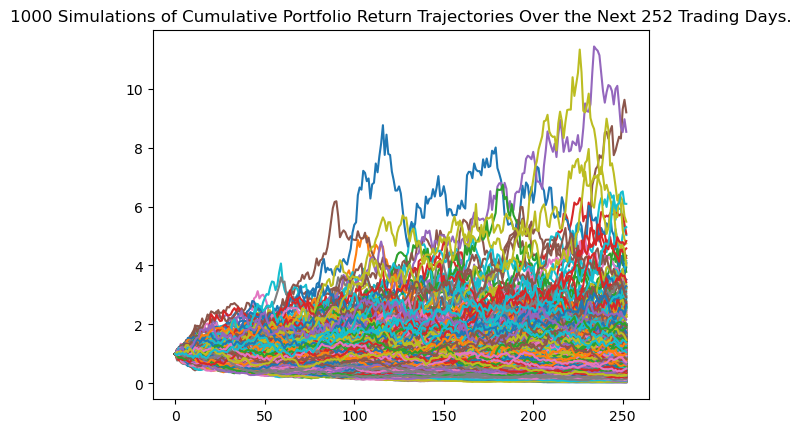

In [42]:
# 1000 Simulaciones de Rendimiento diario a lo largo de 1 ano
MC_LCID.plot_simulation();

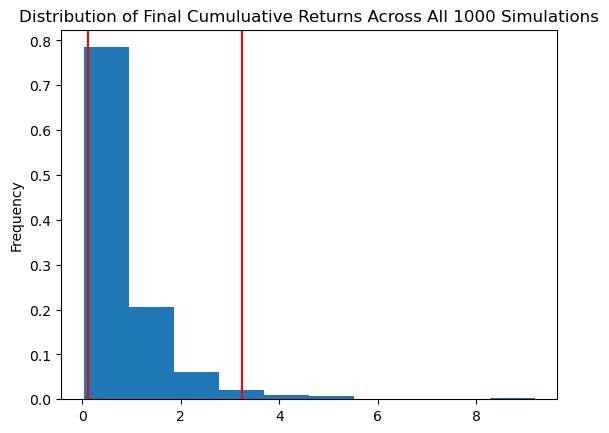

In [43]:
# Muestra los cambios a los largo de 1 ano y su frecuencia
MC_LCID.plot_distribution();

In [44]:
# Calcula un resumen de estadistica obtenido de las simulaciones de daily returns
simulated_returns_data = {
    "mean": list(MC_LCID.simulated_return.mean(axis=1)),
    "median": list(MC_LCID.simulated_return.median(axis=1)),
    "min": list(MC_LCID.simulated_return.min(axis=1)),
    "max": list(MC_LCID.simulated_return.max(axis=1))}

df_simulated_returns = pd.DataFrame(simulated_returns_data)
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000393,0.999031,0.773140,1.169671
2,0.998645,0.996581,0.782292,1.239785
3,0.996241,0.996099,0.719998,1.343797
4,0.997580,0.991280,0.671056,1.320671


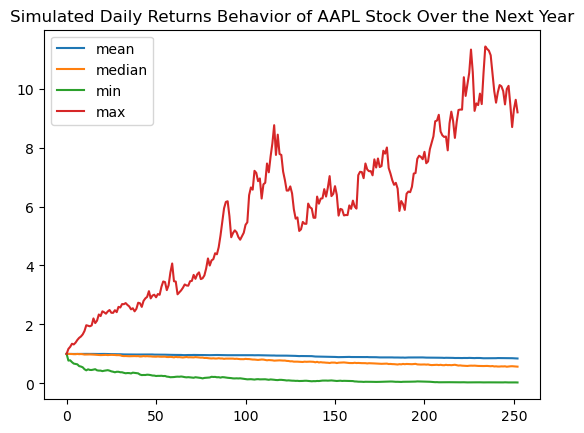

In [45]:
# Simula los Profits / Losses 
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of AAPL Stock Over the Next Year");

In [46]:
# Calcula la simulacion de Profits/Loses con una inversion de $10,000 de LCID sobre los siguientes 252 trading days
initial_investment = 10000
cumulative_pnl = initial_investment * df_simulated_returns
cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10003.931450,9990.305741,7731.396172,11696.711462
2,9986.446566,9965.808746,7822.919438,12397.854534
3,9962.412070,9960.990315,7199.979262,13437.972245
4,9975.798533,9912.800162,6710.564286,13206.709868


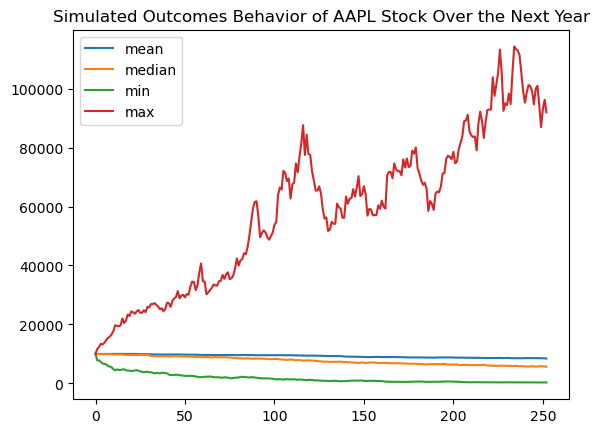

In [47]:
# Calcula la simulacion de Profits/Loses con una inversion de $10,000 de LCID sobre los siguientes 252 trading days
cumulative_pnl.plot(title="Simulated Outcomes Behavior of AAPL Stock Over the Next Year");

In [48]:
# Calcula el rango de posibles resultados de una inversion de $10,000 en LCID stocks
tbl = MC_LCID.summarize_cumulative_return()
print(tbl)

count           1000.000000
mean               0.844312
std                0.888084
min                0.030565
25%                0.316131
50%                0.567593
75%                1.040550
max                9.194670
95% CI Lower       0.108768
95% CI Upper       3.249272
Name: 252, dtype: float64


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [49]:
lower = round(tbl[8]*10000,2)
upper = round(tbl[9]*10000,2)
print(f"Aqui hay un 95% de chances que tu invercion inicial de: $10,000 en el portafolio de el ano siguiente pueda terminar en el rango de:" f" ${lower} and ${upper}.")

Aqui hay un 95% de chances que tu invercion inicial de: $10,000 en el portafolio de el ano siguiente pueda terminar en el rango de: $1087.68 and $32492.72.
